<h1 style="font-size:35px;
        color:black;
        ">Tutorial 08: Hydrogen atom and energy measurements</h1>

In [1]:
from qiskit import *
import numpy as np
from qiskit_aer import QasmSimulator, AerSimulator

The ground state of the Hydrogen atom is a superposition of four different states due to the spins of the electron and proton. Here the goal is to evaluate the energy difference among these four states ("hyperfine splitting") by computing the energy expectation value for the system of two spins with the Hamiltonian expressed in terms of Pauli operators. For more information about the hyperfine structure of Hydrogen, see e.g. [here](https://www.feynmanlectures.caltech.edu/III_12.html) .


0,Both electron and proton have spin $1/2$, and thus, if we consider only spin degrees-of-freedom, the Hydrogen atom can be mapped into a two-qubit system, with for example
$  \uparrow \rangle \equiv | 0 \rangle$ and $ | \downarrow \rangle \equiv | 1 \rangle$.


The corresponding Hamiltonian is a spin-spin interaction 

\begin{align}
H &= \vec{\sigma}^{(1)}.\vec{\sigma}^{(0)} \\
  &= a \, (X^{(1)} \otimes X^{(0)}+Y^{(1)} \otimes Y^{(0)}+Z^{(1)}\otimes Z^{(0)})
\end{align}


where $a = 1.47e^{-6} eV$ and $X^{(i)}, Y^{(i)}, Z^{(i)}$ are Pauli gates acting on qubit $(i)$. 


The energy expectation value of the system in some state $|\Xi \rangle$ can be evaluated by combining the expectation value of each term in the Hamiltonian.
In this case: $$E = \langle \Xi | H | \Xi \rangle = a\, ( \langle \Xi | X^{(1)} X^{(0)} | \Xi \rangle + \langle \Xi | Y^{(1)}Y^{(0)} | \Xi \rangle + \langle \Xi |Z^{(1)}Z^{(0)} |\Xi \rangle ) \; .$$  


The spins of the electron and proton can couple to a total spin $S=0$ (singlet state) or $S=1$ (triplet state). 
The Bell state $$ |\Psi^- \rangle = \frac{1}{\sqrt2} (|10\rangle - |01\rangle) $$
corresponds to the singlet spin state, while  
$$
\begin{align}
|\Phi^+ \rangle &= \frac{1}{\sqrt2} (|00\rangle + |11\rangle)\\
|\Phi^- \rangle &= \frac{1}{\sqrt2} (|00\rangle - |11\rangle)\\
|\Psi^+ \rangle &= \frac{1}{\sqrt2} (|10\rangle + |01\rangle)
\end{align}
$$

are (linear combinations) of the triplet spin state.





<br>
<div style="background:rgb(66, 26, 188); border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background:rgb(40, 31, 40);
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">The goal is to compute the energy of the system for each of the four Bell states $ | \Xi \rangle = |\Phi^+ \rangle, \, |\Phi^- \rangle, \, |\Psi^+ \rangle, |\Psi^- \rangle $ using the derivations of the previous questions in Problem 1.</p>
</div>

<h4 style="font-size: 17px">&#128211;Step A. Create the circuits to prepare the four Bell states: </h4>

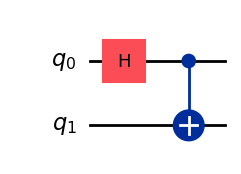

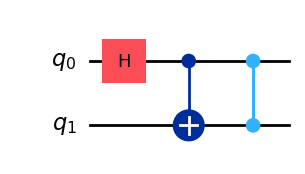

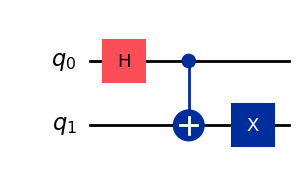

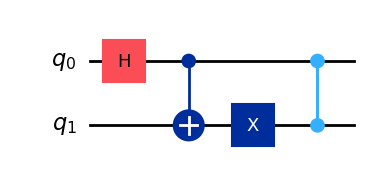

In [4]:
# circuit for the state |Phi^+>
# your code goes here
Phi_p = QuantumCircuit(2)
Phi_p.h(0)
Phi_p.cx(0,1)
#





# circuit for the state |Phi^->
# your code goes here
Phi_m = QuantumCircuit(2)
Phi_m.h(0)
Phi_m.cx(0,1)
Phi_m.cz(0,1)
#




# circuit for the state |Psi_p>
# your code goes here
Psi_p = QuantumCircuit(2)
Psi_p.h(0)
Psi_p.cx(0,1)
Psi_p.x(1)
#





# circuit for the state |Psi_m>
# your code goes here
Psi_m = QuantumCircuit(2)
Psi_m.h(0)
Psi_m.cx(0,1)
Psi_m.x(1)
Psi_m.cz(0,1)
#


display(Phi_p.draw('mpl'))
display(Phi_m.draw('mpl'))
display(Psi_p.draw('mpl'))
display(Psi_m.draw('mpl'))

<h4 style="font-size: 17px">&#128211;Step B. Construct circuits that measure the expectation values of $X^{(1)} X^{(0)} $, $Y^{(1)} Y^{(0)} $ and $Z^{(1)} Z^{(0)} $ on the four Bell states, and run them on a simulator (for example the AerSimulator)</h4>

Remember to use your previous answer to question 4) and 5) of the problem: you first need to transform the state, before measuring in the computational basis.

In [ ]:
######## your code goes here

#########       

In [ ]:
########## Print here the energy of each Bell state


##########

 <h4 style="font-size: 17px">Step C. Understanding the result. </h4>

If you found the energy expectation values successfully, you would have obtained exactly the same value, $a = 1.47e^{-6}$ eV, for the triplet states, $|\Phi^+\rangle, |\Psi^-\rangle, |\Psi^+\rangle$ and one lower energy level, $-3a =  -4.41e^{-6}$ eV for the singlet state $|\Psi^-\rangle$.   

What we have done here is measuring the energies of the four different spin states of the Hydrogen and observed the "hyperfine structure" in the energy levels caused by spin-spin coupling.  This tiny energy difference between the singlet and triplet states is the reason for the famous $\simeq$ 21-cm wavelength radiation used to map the structure of the galaxy.  

In the cell below, we verify the wavelength of the emission from the transition between the triplet states and singlet state. 

In [5]:
# reduced plank constant in (eV) and the speed of light(cgs units)
hbar, c = 4.1357e-15, 3e10
a = 1.47e-6
# Print here the energy difference between the triplets and singlet
########## your code goes here
E_del = a - (-3*a)
##########

# frequency associated with the energy difference
f = E_del/hbar

# convert frequency to wavelength in (cm) 
wavelength = c/f

print('The wavelength of the radiation from the transition\
 in the hyperfine structure is : {:.1f} cm'.format(wavelength))

The wavelength of the radiation from the transition in the hyperfine structure is : 21.1 cm
